In [13]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using ProgressBars, JuMP, Gurobi

const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer

ConvexHullPricing.Optimizer

In [32]:
BEinstances = []
for file in readdir("C:\\Users\\Sofiane\\Desktop\\ConvexHullPricing\\data\\belgian"; join=true)
    push!(BEinstances, UT.load_data(file))
end

instance = BEinstances[6]

LP_Relax = UT.LP_Relaxation(instance)
ObjM = UT.Matching(instance).Obj


-2.5552954913791647e9

In [36]:
using BenchmarkTools

In [108]:
UltraOptimalBE = []
for i=1:8
    instance = BEinstances[i]
    LP_Relax = UT.LP_Relaxation(instance)
    BLMxstar, BLMiterates, BLMfvalues, BLMtimevector = OPT.tBundleLevelMethod(instance, LP_Relax, 3600, .98)
    push!(UltraOptimalBE, [BLMxstar, BLMiterates, BLMfvalues, BLMtimevector])
end

┌ Info: UB = 3.1513220404993896e9, LB = 3.151253588098709e9, UB-LB = 68452.40068054199
└ @ ConvexHullPricing.Optimizer c:\Users\Sofiane\Desktop\ConvexHullPricing\src\optimizers\dual_methods\BundleLevelMethod.jl:144


┌ Info: UB = 2.662041661270815e9, LB = 2.662038757325644e9, UB-LB = 2903.945170879364
└ @ ConvexHullPricing.Optimizer c:\Users\Sofiane\Desktop\ConvexHullPricing\src\optimizers\dual_methods\BundleLevelMethod.jl:144


┌ Info: UB = 2.9463718169082007e9, LB = 2.9463541883567896e9, UB-LB = 17628.551411151886
└ @ ConvexHullPricing.Optimizer c:\Users\Sofiane\Desktop\ConvexHullPricing\src\optimizers\dual_methods\BundleLevelMethod.jl:144


┌ Info: UB = 2.569811962317662e9, LB = 2.5698030086984305e9, UB-LB = 8953.61923122406
└ @ ConvexHullPricing.Optimizer c:\Users\Sofiane\Desktop\ConvexHullPricing\src\optimizers\dual_methods\BundleLevelMethod.jl:144


┌ Info: UB = 2.799222296623209e9, LB = 2.7992162940483413e9, UB-LB = 6002.574867725372
└ @ ConvexHullPricing.Optimizer c:\Users\Sofiane\Desktop\ConvexHullPricing\src\optimizers\dual_methods\BundleLevelMethod.jl:144


┌ Info: UB = 2.555339360966513e9, LB = 2.555333357823383e9, UB-LB = 6003.143130302429
└ @ ConvexHullPricing.Optimizer c:\Users\Sofiane\Desktop\ConvexHullPricing\src\optimizers\dual_methods\BundleLevelMethod.jl:144


┌ Info: UB = 3.2804482034899526e9, LB = 3.280390529105666e9, UB-LB = 57674.384286403656
└ @ ConvexHullPricing.Optimizer c:\Users\Sofiane\Desktop\ConvexHullPricing\src\optimizers\dual_methods\BundleLevelMethod.jl:144


┌ Info: UB = 2.7906882259546204e9, LB = 2.79063159416059e9, UB-LB = 56631.794030189514
└ @ ConvexHullPricing.Optimizer c:\Users\Sofiane\Desktop\ConvexHullPricing\src\optimizers\dual_methods\BundleLevelMethod.jl:144


In [136]:
using Plots

In [137]:
x = [k for k=1:10]
myf(alpha, x) = 1 - alpha * x
y = myf.(1, x) 

10-element Vector{Int64}:
  0
 -1
 -2
 -3
 -4
 -5
 -6
 -7
 -8
 -9

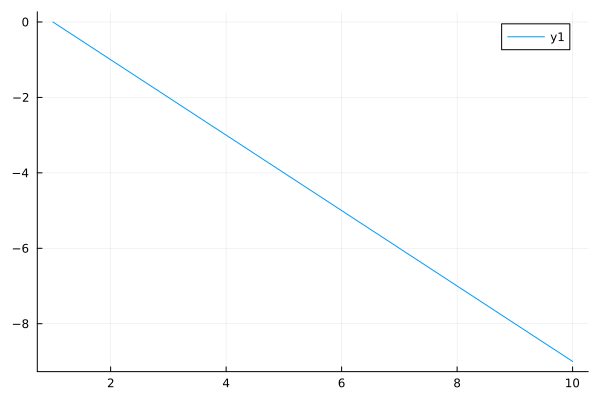

In [138]:
plot(x, y)

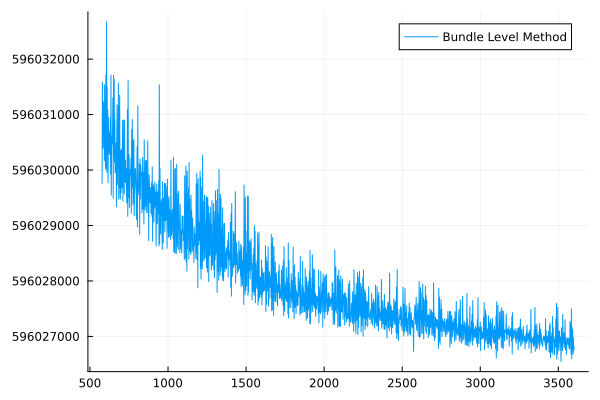

In [135]:
I = 1

plot(OneHourBE[I][4][302:end], -(OneHourBE[I][3] .- ObjM)[301:end], label = "Bundle Level Method")

In [99]:
xstar, iterates, fvalues, timevector = OPT.tFastGradientMethod(instance, LP_Relax, 60, 5e-3)

([47.49995137414744, 45.43542621717699, 45.83801028760425, 44.51090426473606, 44.51102685029387, 44.51102685029387, 42.66299947782872, 45.31686539592287, 44.422450465342585, 45.313619101901054  …  47.48325338065778, 43.51306643922342, 45.30762592447862, 47.847778643346494, 45.49596129885186, 45.50744800066043, 45.52269644683494, 44.51102685029387, 44.16362788493841, 44.16362788493842], [[47.4682, 45.40111900618594, 45.803539506974786, 44.4739, 44.4739, 44.4739, 42.62419286057494, 45.28063247968028, 44.38513812217332, 45.27817300595931  …  47.44950054292583, 43.4767, 45.273213251231525, 47.81593622422252, 45.461554334449175, 45.47240781290494, 45.48768819172297, 44.4739, 44.125773526595744, 44.12577352659575], [47.46987255232868, 45.402926077844285, 45.80535530307026, 44.47584913895129, 44.47585565010323, 44.47585565010323, 42.62623613769562, 45.282540297240764, 44.38710354308011, 45.28004012263198  …  47.451278523216466, 43.47861553990111, 45.27502589596125, 47.817613590809366, 45.4633

In [105]:
fvalues = Float64[]
for price in iterates
    push!(fvalues, UT.exact_oracle(instance, price)[1])
end

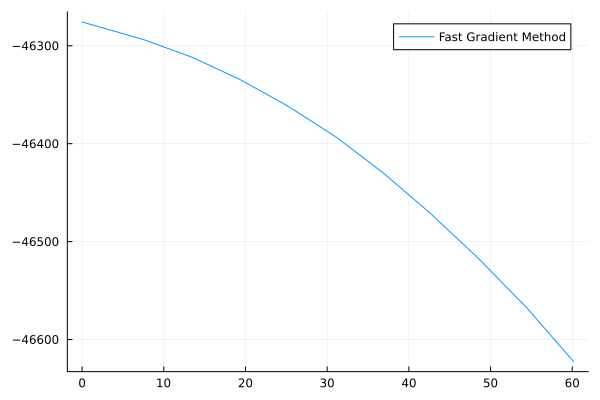

In [107]:
plot(timevector[1:end], (fvalues .- ObjM)[1:end], label = "Fast Gradient Method")

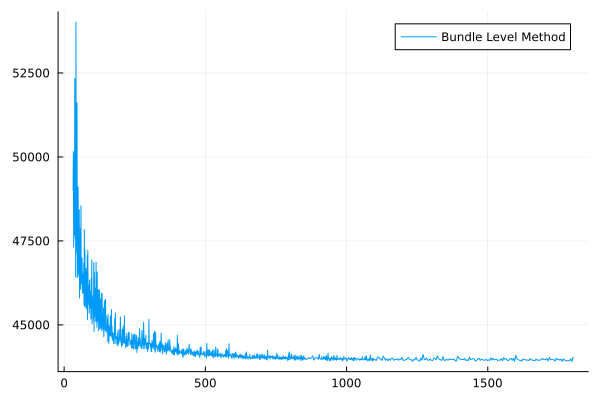

In [98]:
# plot(timevector[31:end], (- fvalues .+ ObjM)[30:end], label = "Subgradient Method")
plot(BLMtimevector[31:end], (- BLMfvalues .+ ObjM)[30:end], label = "Bundle Level Method")
# plot!(yscale=:log)

In [ ]:
optimals = load_object("results//tables//beOptimalDF.jld2")